<a href="https://colab.research.google.com/github/ashutoshsinha25/pepcoding_FJP_DS/blob/main/Ensemble/FJP_DS_Ensemble_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A group of predictors is called an ensemble; thus, this technique is called Ensemble Learning, and an Ensemble Learning algorithm is called an Ensemble method.

The most popular Ensemble methods, including

* Voting
    * Hard
    * Soft
* bagging
* Random Forest
* boosting
* stacking
* Cascading

## VotingClassifier 

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [3]:
from sklearn.datasets import make_moons 

In [4]:
X , y = make_moons(noise = 0.2 , n_samples = 500 , shuffle = True)



In [5]:
X 

array([[ 0.07557702,  1.36709892],
       [-0.75288023,  0.64827466],
       [ 1.43380909, -0.23165744],
       [ 1.22679337, -0.33866892],
       [ 1.02679024, -0.10332749],
       [-0.31687288,  1.03490057],
       [ 1.12689213, -0.62971925],
       [ 0.63252222, -0.24487508],
       [ 0.79801178,  0.89501969],
       [ 0.39710912,  1.03565678],
       [ 0.11666629,  0.58196228],
       [ 0.89137441,  0.52915639],
       [-1.20448961,  0.07298903],
       [ 0.75011057, -0.62512541],
       [-0.24166242,  0.36816198],
       [ 2.35371547,  0.65434184],
       [ 1.68235903, -0.07381583],
       [ 1.78794075, -0.54718267],
       [ 0.93024848,  0.47394667],
       [ 0.72053837,  0.61413614],
       [ 0.09177204,  0.06613455],
       [ 0.32533413, -0.13359335],
       [-0.03492092,  0.29384742],
       [ 1.66099239, -0.31407544],
       [-0.19129215,  0.62080925],
       [ 0.35173448,  1.22940343],
       [ 0.48831336,  0.0248718 ],
       [ 1.90543994,  0.02406287],
       [ 2.11761023,

In [6]:
y 

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,

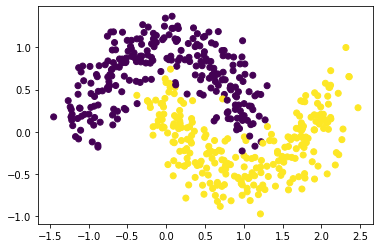

In [7]:
plt.scatter(X[: , 0] , X[: , 1], c = y )

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train , X_test , y_train , y_test = train_test_split(X , y)

In [10]:
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC 


In [12]:
log = LogisticRegression()
knn = KNeighborsClassifier() 
tree = DecisionTreeClassifier()
nb = GaussianNB()
svm = SVC()

### Hard voting 

based majority voting

In [14]:
from sklearn.ensemble import VotingClassifier 

vot = VotingClassifier([
    ('logistic' , log),
    ('neighbors' , knn),
    ('tree' , tree),
    ('naive bayes' , nb),
    ('SVM' , svm)
] , n_jobs = -1)

In [15]:
vot.fit(X_train , y_train)

VotingClassifier(estimators=[('logistic', LogisticRegression()),
                             ('neighbors', KNeighborsClassifier()),
                             ('tree', DecisionTreeClassifier()),
                             ('naive bayes', GaussianNB()), ('SVM', SVC())],
                 n_jobs=-1)

In [16]:
vot.score(X_test , y_test)

0.976

In [18]:
base = [log , knn , tree , nb, svm , vot]
for model in base:
  model.fit(X_train , y_train)
  score = model.score(X_test , y_test)
  print(model.__class__.__name__ , score)

LogisticRegression 0.896
KNeighborsClassifier 0.96
DecisionTreeClassifier 0.928
GaussianNB 0.888
SVC 0.976
VotingClassifier 0.976


### Soft voting 

based on probabilty 

In [22]:
vot = VotingClassifier([
    ('logistic' , log),
    ('neighbors' , knn),
    ('tree' , tree),
    ('naive bayes' , nb),
    ('SVM' , SVC(probability = True))
] , n_jobs = -1 , voting = 'soft')

In [23]:
base = [log , knn , tree , nb, svm , vot]
for model in base:
  model.fit(X_train , y_train)
  score = model.score(X_test , y_test)
  print(model.__class__.__name__ , score)

LogisticRegression 0.896
KNeighborsClassifier 0.96
DecisionTreeClassifier 0.936
GaussianNB 0.888
SVC 0.976
VotingClassifier 0.976


## Bagging and Pasting

above we saw base model's of different algorithms. another approach is to use the same algorithm for every predictor, but to train them on different random subset of training set. When sampling is performed with replacement , this method is called as **bagging** ( short for **bootstrap aggregating**) , it does row sampling. When the sampling is performed without replacement, its called as **pasting**


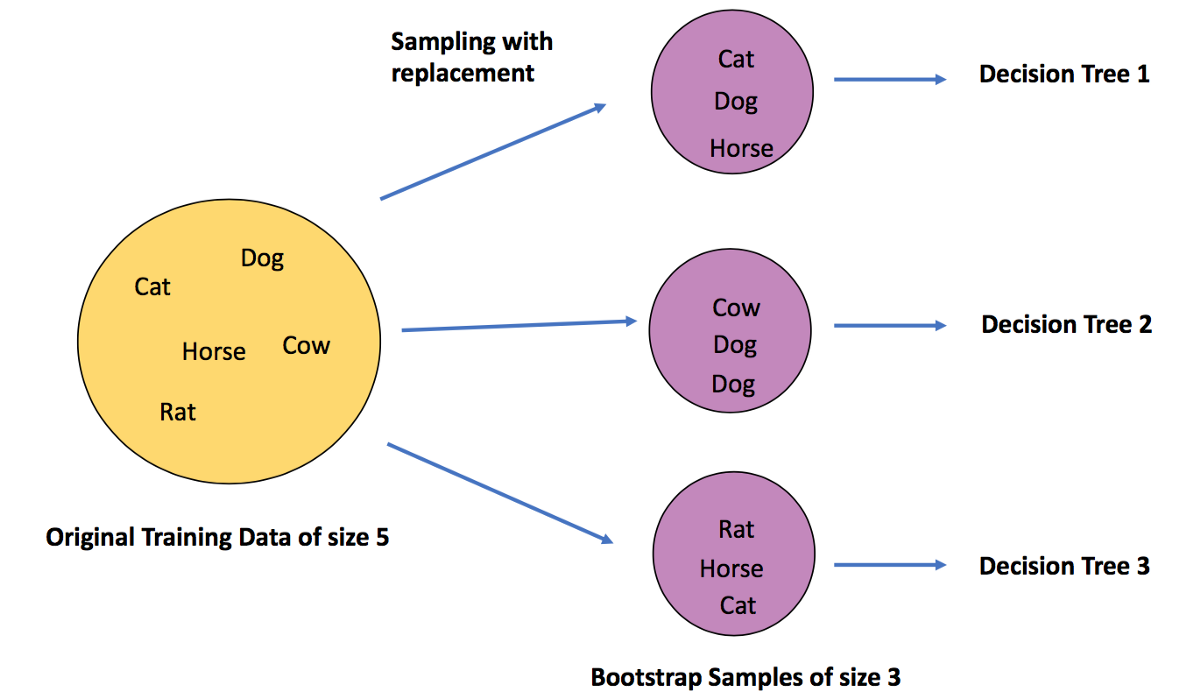

In [25]:
# generating dataset 

from sklearn.ensemble import BaggingRegressor 
from sklearn.tree import DecisionTreeRegressor 

In [26]:
# Settings
n_repeat = 50  # Number of datasets
n_train = 50  # Size of the training set
n_test = 1000  # Size of the test set
noise = 0.1  # Standard deviation of the noise
np.random.seed(0)


# Generate data
def f(x):
    x = x.ravel()

    return np.exp(-(x ** 2)) + 1.5 * np.exp(-((x - 2) ** 2))


def generate(n_samples, noise, n_repeat=1):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X)

    if n_repeat == 1:
        y = f(X) + np.random.normal(0.0, noise, n_samples)
    else:
        y = np.zeros((n_samples, n_repeat))

        for i in range(n_repeat):
            y[:, i] = f(X) + np.random.normal(0.0, noise, n_samples)

    X = X.reshape((n_samples, 1))

    return X, y


X_trains = []
y_trains = []

for i in range(n_repeat):
    X, y = generate(n_samples=n_train, noise=noise)
    X_trains.append(X)
    y_trains.append(y)

X_test, y_test = generate(n_samples=n_test, noise=noise, n_repeat=n_repeat)

In [28]:

len(X_trains), len(y_trains)

(50, 50)

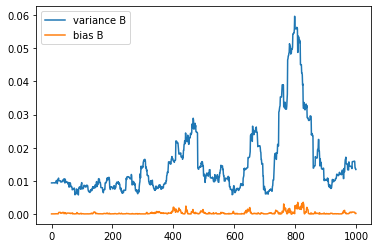

In [29]:
from sklearn.tree import DecisionTreeRegressor
MB = DecisionTreeRegressor()

y_pred = np.zeros( (n_test, n_repeat) )

for i in range(n_repeat):
    MB.fit(X_trains[i], y_trains[i])
    y_pred[:, i] = MB.predict(X_test)

varianceB = np.var(y_pred, axis = 1)
biasB = (f(X_test) - np.mean(y_pred, axis = 1))**2

plt.plot(varianceB, label = 'variance B')
plt.plot(biasB, label = 'bias B')
plt.legend()
plt.show()


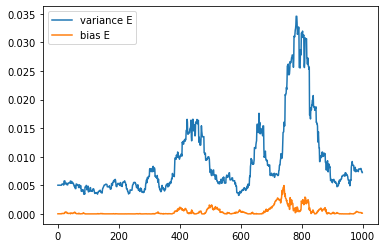

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

ME = BaggingRegressor()

y_pred = np.zeros( (n_test, n_repeat) )

for i in range(n_repeat):
    ME.fit(X_trains[i], y_trains[i])
    y_pred[:, i] = ME.predict(X_test)

varianceE = np.var(y_pred, axis = 1)
biasE = (f(X_test) - np.mean(y_pred, axis = 1))**2

plt.plot(varianceE, label = 'variance E')
plt.plot(biasE, label = 'bias E')
plt.legend()
plt.show()

## Reduce variance 
Variance Model changes a lot with sampling DataSet.

In bagging changing a sub-set to test-instances only few models change and dosent affect's result much.

Bagging can reduce variance without change in bias.

bagging can combine low bias high variance models and convert them to low bias reduced variance model.

Example of low bias and high variance ALGO is DT.

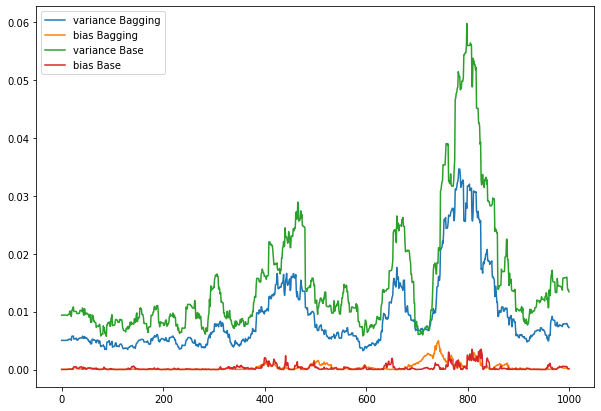

In [31]:
plt.figure(figsize = (10, 7))

plt.plot(varianceE, label = 'variance Bagging')
plt.plot(biasE, label = 'bias Bagging')
plt.plot(varianceB, label = 'variance Base')
plt.plot(biasB, label = 'bias Base')
plt.legend()
plt.show()

  0%|          | 0/9 [00:00<?, ?it/s]

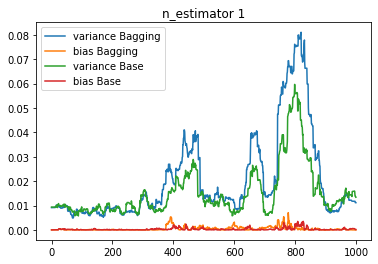

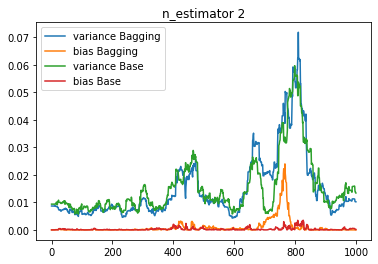

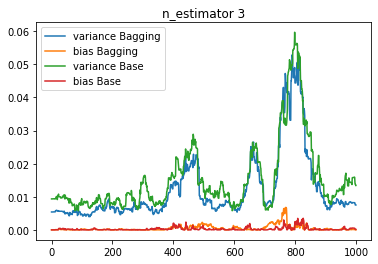

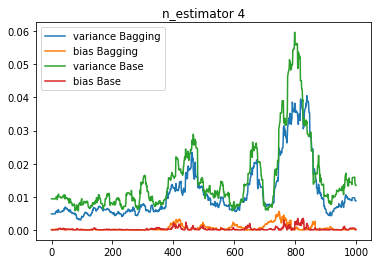

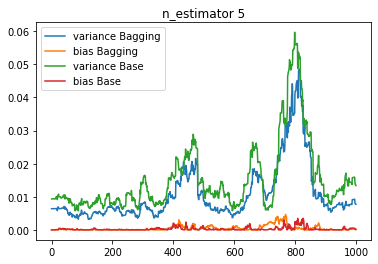

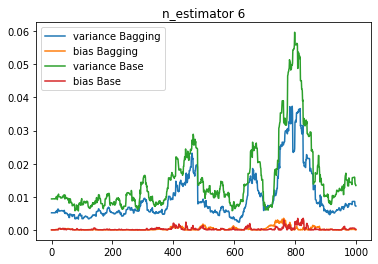

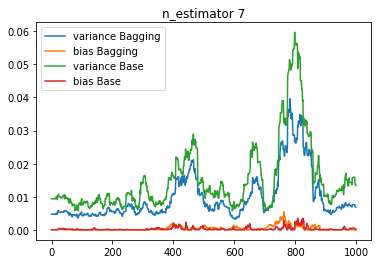

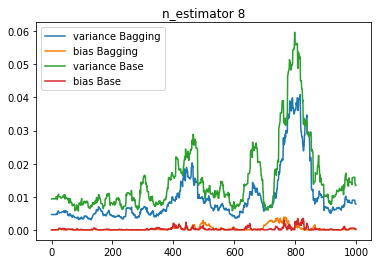

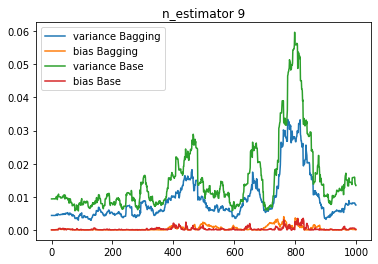

In [32]:
from tqdm.notebook import tqdm

for be in tqdm(range(1, 10)):

    ME = BaggingRegressor(n_estimators=be, n_jobs=-1)

    y_pred = np.zeros( (n_test, n_repeat) )

    for i in range(n_repeat):
        ME.fit(X_trains[i], y_trains[i])
        y_pred[:, i] = ME.predict(X_test)

    varianceE = np.var(y_pred, axis = 1)
    biasE = (f(X_test) - np.mean(y_pred, axis = 1))**2

    plt.title('n_estimator {}'.format(be))
    plt.plot(varianceE, label = 'variance Bagging')
    plt.plot(biasE, label = 'bias Bagging')
    plt.plot(varianceB, label = 'variance Base')
    plt.plot(biasB, label = 'bias Base')
    plt.legend()
    plt.show()

>  for **pasting** algorithm , bootstrap = False , sampling without replacement

### Random Forest 

`Random Forests = DecisionTree + Bagging(row sampling) +  feature bagging(column sampling)`

A Random Forest is an ensemble of Decision Trees. Generally trained via the bagging method (or sometimes pasting).

Random Forest is optimised for Decesion Tree than BaggingClassifier.

In [33]:
from sklearn.datasets import make_regression

features = 50

x_trains = np.zeros((50, n_train, features))
y_trains = np.zeros((50, n_train))

for i in enumerate(range(n_repeat)):
    X, y = make_regression(n_samples = n_train, n_features = features)
    x_trains[i, :, :] = X
    y_trains[i, :] = y

In [34]:

x_test, y_test = make_regression(n_samples = n_test, n_features = features)

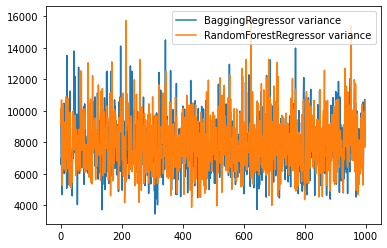

In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

estimators = [
    BaggingRegressor(n_estimators = 10, n_jobs=-1),
    RandomForestRegressor(n_estimators = 10, n_jobs=-1)
]

def calBiasVar(model):
    y_pred = np.zeros( (x_test.shape[0], n_repeat) )

    for i in range(n_repeat):
        model.fit(x_trains[i], y_trains[i])
        y_pred[:, i] = model.predict(x_test)

    varianceE = np.var(y_pred, axis = 1)
    biasE = (y_test - np.mean(y_pred, axis = 1))**2

    plt.plot(varianceE, label = model.__class__.__name__ + ' variance')
    # plt.plot(biasE, label = model.__class__.__name__ + ' bias')

for model in estimators:
    calBiasVar(model)

plt.legend()
plt.show()

### Extra Tree

`ExtraTreesClassifier = row_sampling + col_sampling + randomized_selection_TAU`

Because of randomized_selection_TAU variance is reduced even more than RandomForest.

Using random thresholds for each feature rather than searching for the best possible thresholds(like regular Decision Trees do) is simply called an Extremely Randomized Trees ensemble.


> **Syntax:** `from sklearn.ensemble import ExtraTreesRegressor`

## Adaboost

In [36]:

import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

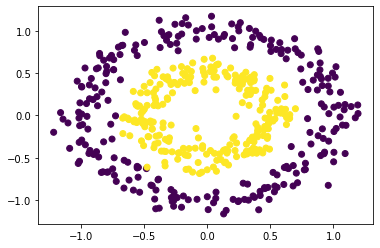

In [37]:
X, y = make_circles(n_samples = 500, noise = 0.1, factor = 0.5)

plt.scatter(X[:, 0], X[:, 1], c = y)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 42)

In [39]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=1)

In [40]:

tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [41]:
y_pred = tree.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score
print("Testing Score: ", accuracy_score(tree.predict(X_test), y_test))
print("Training Score: ", accuracy_score(tree.predict(X_train), y_train))

Testing Score:  0.6333333333333333
Training Score:  0.6342857142857142


In [43]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier()

adaboost.fit(X_train, y_train)

AdaBoostClassifier()

In [44]:
print("Testing Score: ", accuracy_score(adaboost.predict(X_test), y_test))
print("Training Score: ", accuracy_score(adaboost.predict(X_train), y_train))

Testing Score:  0.9866666666666667
Training Score:  1.0


## Stacking 

In [45]:
from sklearn.ensemble import StackingRegressor

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

base_models = [
          ("Linear Leg", LinearRegression()),
          ("KNN", KNeighborsRegressor()),
          ("Decision Tree", DecisionTreeRegressor())
]

meta_model = SVR()

In [47]:
stacking = StackingRegressor(estimators = base_models, final_estimator = meta_model, cv = 5)

In [48]:

stacking.fit(X_train, y_train)

StackingRegressor(cv=5,
                  estimators=[('Linear Leg', LinearRegression()),
                              ('KNN', KNeighborsRegressor()),
                              ('Decision Tree', DecisionTreeRegressor())],
                  final_estimator=SVR())

In [49]:

from sklearn.metrics import mean_squared_error

mean_squared_error(stacking.predict(X_test), y_test)

0.012211854465271168